#### Setting up the directory

In [1]:
import os
os.chdir("C:/Users/akank/Downloads/3533/code/notebook/Akanksha_Dash_B78-by-3533-1582979307031/Mith_Exam/ProblemDescription_and_Dataset-1582885222142/ProblemDescription_and_Dataset")

## _Exploratory Analysis_

### _Import Libraries_

In [2]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, precision_score,classification_report

import warnings
warnings.filterwarnings('ignore')

#### Defining required Functions

In [3]:
def convert_for_sklearn(label_list):
    return [1 if i == 'yes' else 0 for i in label_list]

def accuracy_precision_recall_metrics(y_true, y_pred):
    
    y_test_scoring = convert_for_sklearn(y_test)
    test_pred_scoring = convert_for_sklearn(y_pred)

    acc = accuracy_score(y_true= y_test_scoring, y_pred = test_pred_scoring)
    prec = precision_score(y_true= y_test_scoring, y_pred = test_pred_scoring)
    rec = recall_score(y_true= y_test_scoring, y_pred = test_pred_scoring)
    
    print("Test Precision: ",acc)
    print("Test Recall: ",prec)
    print("Test Accuracy: ",rec)

### Reading the data

In [4]:
tmd = pd.read_csv("train_merchant_data.csv", sep=',', header=0,
                        na_values='unknown')
tod=pd.read_csv("train_order_data.csv", sep=',', header=0,
                        na_values='unknown')
tr=pd.read_csv("train.csv", sep=',', header=0,
                        na_values='unknown')

### _Understand the dataset_

Undestanding the dataset can be as thorough as you want it to be, you can start by looking at the variables and asking questions, like the one's mentioned below.

In [5]:
tmd.head()

,Ecommerce_Provider_ID,Merchant_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address
0,1746213,50448,2018-05-01 21:15:11,VATQMMZTVOZUT,F,39,48.151.136.76
1,1746213,338754,2018-04-14 10:13:00,LJCILLBRQZNKS,M,35,94.9.145.169
2,1746213,291127,2018-06-20 07:44:22,JFVHSUGKDAYZV,F,40,58.94.157.121
3,1746213,319919,2018-06-27 01:41:39,WFRXMPLQYXRMY,M,37,193.187.41.186
4,1746213,195911,2018-01-05 00:55:41,GGHKWMSWHCMID,F,27,125.96.20.172


In [6]:
tod.head()

,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Merchant_ID
0,126221,37cea9512f8d,2018-04-29 16:39:26,148,Direct,Credit Card,124231
1,115471,09f12e6efde2,2018-06-16 17:05:40,145,SEO,Credit Card,136178
2,151786,4e69e956e159,2018-10-26 18:00:46,62,Ads,Internet Banking,198611
3,140456,663443aaeb82,2018-12-12 05:41:52,28,SEO,Debit Card,127993
4,114721,99258810c121,2018-09-20 11:06:10,70,Ads,Credit Card,250146


In [7]:
tr.head()

,Merchant_ID,Fraudster
0,221592,0
1,316935,1
2,38454,1
3,214437,1
4,296240,1


In [8]:
#merging the dataset
mrd = tod.merge(tr,on='Merchant_ID',how='left')
mrd = mrd.merge(tmd,on='Merchant_ID',how='left')
mrd.head()

,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Merchant_ID,Fraudster,Ecommerce_Provider_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address
0,126221,37cea9512f8d,2018-04-29 16:39:26,148,Direct,Credit Card,124231,0,1746213,2018-04-19 00:48:20,BEJVAJMFDUVOQ,M,30,37.113.112.143
1,115471,09f12e6efde2,2018-06-16 17:05:40,145,SEO,Credit Card,136178,0,1746213,2018-05-15 23:30:37,GFHLOGZGFHNYH,F,20,190.255.172.133
2,151786,4e69e956e159,2018-10-26 18:00:46,62,Ads,Internet Banking,198611,1,1746213,2018-08-11 04:12:15,MTELXLHIBWHGI,F,46,130.243.149.190
3,140456,663443aaeb82,2018-12-12 05:41:52,28,SEO,Debit Card,127993,0,1746213,2018-08-17 01:52:14,ZPJCMOXVRXVJF,M,37,48.250.147.203
4,114721,99258810c121,2018-09-20 11:06:10,70,Ads,Credit Card,250146,0,1746213,2018-05-26 11:58:33,NVDDVXILKZTVO,F,26,212.167.41.153


In [9]:
train_data=mrd

In [10]:
#display the dataframe head(4) returns the first 10 rows
train_data.head(4)

,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Merchant_ID,Fraudster,Ecommerce_Provider_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address
0,126221,37cea9512f8d,2018-04-29 16:39:26,148,Direct,Credit Card,124231,0,1746213,2018-04-19 00:48:20,BEJVAJMFDUVOQ,M,30,37.113.112.143
1,115471,09f12e6efde2,2018-06-16 17:05:40,145,SEO,Credit Card,136178,0,1746213,2018-05-15 23:30:37,GFHLOGZGFHNYH,F,20,190.255.172.133
2,151786,4e69e956e159,2018-10-26 18:00:46,62,Ads,Internet Banking,198611,1,1746213,2018-08-11 04:12:15,MTELXLHIBWHGI,F,46,130.243.149.190
3,140456,663443aaeb82,2018-12-12 05:41:52,28,SEO,Debit Card,127993,0,1746213,2018-08-17 01:52:14,ZPJCMOXVRXVJF,M,37,48.250.147.203


In [11]:
#Shape of a table (number or rows, number of columns)
train_data.shape

(54213, 14)

In [12]:
#Shape of a table (number or rows, number of columns)
train_data.shape

(54213, 14)

In [13]:
#Display the names of all columns in a dataframe
train_data.columns

Index(['Customer_ID', 'Order_ID', 'Date_of_Order', 'Order_Value_USD',
       'Order_Source', 'Order_Payment_Method', 'Merchant_ID', 'Fraudster',
       'Ecommerce_Provider_ID', 'Merchant_Registration_Date',
       'Registered_Device_ID', 'Gender', 'Age', 'IP_Address'],
      dtype='object')

In [14]:
testmd = pd.read_csv("test_merchant_data.csv", sep=',', header=0,
                        na_values='unknown')
testod=pd.read_csv("test_order_data.csv", sep=',', header=0,
                        na_values='unknown')
testd=pd.read_csv("test.csv", sep=',', header=0,
                        na_values='unknown')

In [15]:
testmd.head()

,Ecommerce_Provider_ID,Merchant_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address
0,1746213,53637,2018-02-11 20:50:29,PTMLBENYMQCTV,F,40,134.162.124.62
1,1746213,243517,2018-04-06 13:19:39,HMCLDZUZPWZRR,M,39,152.76.98.87
2,1746213,343640,2018-01-12 16:47:49,VLGSMAPXISSEJ,M,23,31.202.3.255
3,1746213,69889,2018-02-19 21:58:52,ZINHISBBOKQXT,M,34,12.242.168.185
4,1746213,125706,2018-05-17 15:50:19,WFKEAOTPHTYEO,M,20,26.61.210.47


In [16]:
testod.head()

,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Merchant_ID
0,157068,a032de091f51,2018-03-09 09:09:42,60,SEO,Credit Card,53637
1,112534,0d563f0606d6,2018-06-13 20:11:19,28,SEO,Credit Card,243517
2,148774,18fb0fa888b6,2018-04-14 04:19:36,75,Ads,Debit Card,343640
3,114528,ed1eb920d721,2018-04-01 13:55:44,98,SEO,Credit Card,69889
4,120940,313dcf962627,2018-05-25 02:08:18,35,SEO,Credit Card,125706


In [17]:
testd.head()

,Merchant_ID
0,53637
1,243517
2,343640
3,69889
4,125706


In [18]:
testda = testod.merge(testd,on='Merchant_ID',how='left')
testda = testda.merge(testmd,on='Merchant_ID',how='left')
testda.head()

,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Merchant_ID,Ecommerce_Provider_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address
0,157068,a032de091f51,2018-03-09 09:09:42,60,SEO,Credit Card,53637,1746213,2018-02-11 20:50:29,PTMLBENYMQCTV,F,40,134.162.124.62
1,112534,0d563f0606d6,2018-06-13 20:11:19,28,SEO,Credit Card,243517,1746213,2018-04-06 13:19:39,HMCLDZUZPWZRR,M,39,152.76.98.87
2,148774,18fb0fa888b6,2018-04-14 04:19:36,75,Ads,Debit Card,343640,1746213,2018-01-12 16:47:49,VLGSMAPXISSEJ,M,23,31.202.3.255
3,114528,ed1eb920d721,2018-04-01 13:55:44,98,SEO,Credit Card,69889,1746213,2018-02-19 21:58:52,ZINHISBBOKQXT,M,34,12.242.168.185
4,120940,313dcf962627,2018-05-25 02:08:18,35,SEO,Credit Card,125706,1746213,2018-05-17 15:50:19,WFKEAOTPHTYEO,M,20,26.61.210.47


In [19]:
testda.columns

Index(['Customer_ID', 'Order_ID', 'Date_of_Order', 'Order_Value_USD',
       'Order_Source', 'Order_Payment_Method', 'Merchant_ID',
       'Ecommerce_Provider_ID', 'Merchant_Registration_Date',
       'Registered_Device_ID', 'Gender', 'Age', 'IP_Address'],
      dtype='object')

In [20]:
test_data=testda

In [21]:
test_data.columns

Index(['Customer_ID', 'Order_ID', 'Date_of_Order', 'Order_Value_USD',
       'Order_Source', 'Order_Payment_Method', 'Merchant_ID',
       'Ecommerce_Provider_ID', 'Merchant_Registration_Date',
       'Registered_Device_ID', 'Gender', 'Age', 'IP_Address'],
      dtype='object')

In [22]:
ip = pd.read_csv("ip_boundaries_countries.csv", na_values='unknown')

print(ip.shape)
ip.head()

(138846, 3)


,lower_bound_ip_address,upper_bound_ip_address,country
0,1.0.0.0,1.0.0.255,Australia
1,1.0.1.0,1.0.1.255,China
2,1.0.2.0,1.0.3.255,China
3,1.0.4.0,1.0.7.255,Australia
4,1.0.8.0,1.0.15.255,China


In [23]:
test_data.sample(2)

,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Merchant_ID,Ecommerce_Provider_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address
3733,116594,17e166c7c0a7,2018-04-14 20:56:06,88,SEO,Credit Card,75023,1746213,2018-04-02 22:49:24,EPMJHRMPKKWSQ,M,39,242.142.33.40
1540,158404,6d4bfdf706d2,2018-06-14 08:50:55,40,SEO,Credit Card,117108,1746213,2018-02-28 14:11:05,MSROOPJPUAATW,M,40,243.181.61.139


In [24]:
train_data.sample(2)

,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Merchant_ID,Fraudster,Ecommerce_Provider_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address
40014,162863,21b6fd4de8be,2018-01-03 12:16:14,88,SEO,Credit Card,194268,1,1746213,2018-01-01 12:16:13,ZYZNVYVGPOPBL,M,33,239.69.34.217
45015,126506,39c702065f22,2018-10-24 08:16:38,115,SEO,Debit Card,103093,0,1746213,2018-08-09 10:46:53,AKLIAKGHQYWTT,M,23,66.110.117.221


In [25]:
print(train_data.shape)
print(test_data.shape)

(54213, 14)
(13554, 13)


### Distribution of Target variable

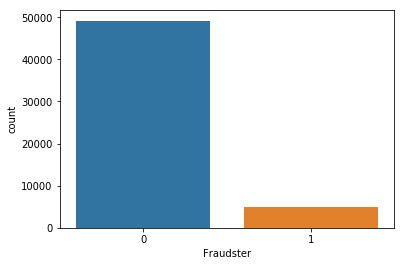

0    49188
1     5025
Name: Fraudster, dtype: int64
5025
49188
0.09268994521609208
Percentage of people who are Fraudster: 0.09268994521609208 %


In [26]:
# Plot Distribution
sns.countplot(x='Fraudster',data=train_data)
plt.show()

# What are the counts?
print(train_data.Fraudster.value_counts())

# What is the percentage?
count_yes = len(train_data[train_data.Fraudster == 1])
print(count_yes)
count_no = len(train_data[train_data.Fraudster != 1])
print(count_no)

percent_success = (count_yes/(count_yes + count_no))
print(percent_success)

print('Percentage of people who are Fraudster:', percent_success, "%")

from the above we can see the percentage of fraudster are quite less

In [27]:
#!pip install maxminddb-geolite2

In [28]:
from geolite2 import geolite2

def get_continent(ip):
    try:
        x = geo.get(ip)
    except ValueError:
        return pd.np.nan
    try:
        return x['continent']['names']['en'] if x else pd.np.nan
    except KeyError:
        return pd.np.nan

geo = geolite2.reader()
# IP's for testing: http://upd.emule-security.org/ipfilter.zip
#x = pd.read_csv(r'D:\download\ipfilter.zip',usecols=[0], sep='\s*\-\s*',header=None, names=['ip'])

# get unique IPs
unique_ips = train_data["IP_Address"].unique()
# make series out of it
unique_ips = pd.Series(unique_ips, index = unique_ips)
# map IP --> country
train_data['Continent'] = train_data['IP_Address'].map(unique_ips.apply(get_continent))

geolite2.close()

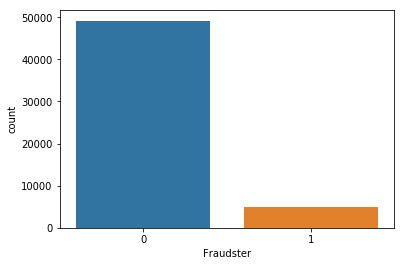

0    90.731005
1     9.268995
Name: Fraudster, dtype: float64

In [29]:
train_data['Fraudster'].value_counts()
sns.countplot(x='Fraudster',data=train_data)
plt.show()
(train_data["Fraudster"].value_counts()/train_data.shape[0]*100)

In [30]:
train_data.sample(3)

,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Merchant_ID,Fraudster,Ecommerce_Provider_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address,Continent
5721,154991,fb96beffa385,2018-02-28 06:20:15,38,SEO,Credit Card,188441,0,1746213,2018-02-19 15:48:55,XCRSILGSMYJFO,M,19,39.45.225.133,Asia
20302,113332,5c2f76509672,2018-06-09 16:58:20,125,SEO,Credit Card,136453,0,1746213,2018-02-26 12:06:53,EGIPHTWINRPRF,M,33,30.72.142.12,North America
32045,113406,af5e71d8a559,2018-06-15 12:47:44,105,SEO,Credit Card,373198,0,1746213,2018-04-24 00:06:50,SWBNGSAKGURQV,M,24,220.29.92.159,Asia


In [31]:
train_data['Continent'].isnull().sum()

7751

In [32]:
from geolite2 import geolite2

def get_continent(ip):
    try:
        x = geo.get(ip)
    except ValueError:
        return pd.np.nan
    try:
        return x['continent']['names']['en'] if x else pd.np.nan
    except KeyError:
        return pd.np.nan

geo = geolite2.reader()

# IP's for testing: http://upd.emule-security.org/ipfilter.zip
#x = pd.read_csv(r'D:\download\ipfilter.zip',usecols=[0], sep='\s*\-\s*',header=None, names=['ip'])

# get unique IPs
unique_ips = test_data["IP_Address"].unique()
# make series out of it
unique_ips = pd.Series(unique_ips, index = unique_ips)
# map IP --> country
test_data['Continent'] = test_data['IP_Address'].map(unique_ips.apply(get_continent))

geolite2.close()

In [33]:
train_data['Continent'].fillna('Unknown', inplace=True)

In [34]:
train_data.sample(3)

,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Merchant_ID,Fraudster,Ecommerce_Provider_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address,Continent
5750,124187,a7f3ade40a30,2018-11-11 03:59:53,95,Direct,Credit Card,387904,0,1746213,2018-07-30 17:55:19,TOUEPXWIYWFWQ,M,25,242.71.83.251,Unknown
13330,156260,66e40090f7f9,2018-09-26 02:59:25,65,Ads,Credit Card,345744,0,1746213,2018-06-19 18:23:56,AIMNEOGSVISVI,M,22,7.93.49.236,North America
3164,152206,7412c6980d23,2018-10-25 15:21:52,82,Ads,E-wallet,387994,0,1746213,2018-06-26 07:35:29,LMDUKUHSHGSSN,M,22,14.214.194.116,Asia


In [35]:
train_data['Continent'].fillna('Unknown', inplace=True)

In [36]:
test_data['Continent'].isnull().sum()

1967

In [37]:
test_data['Continent'].fillna('Unknown', inplace=True)

In [38]:
contint = pd.crosstab(train_data.Fraudster,train_data.Continent)

In [39]:
contint

Continent,Africa,Asia,Europe,North America,Oceania,South America,Unknown
Fraudster,,,,,,,
0,585,10371,8637,20123,711,1661,7100
1,81,1062,849,2126,67,189,651


### Feature Enginering

Converting Date_of_order and Merchand_registration_date type as datetime64 for both train and test data

In [40]:
train_data["Date_of_Order"] = train_data["Date_of_Order"].astype('datetime64[ns]') 
train_data["Merchant_Registration_Date"] = train_data["Merchant_Registration_Date"].astype('datetime64[ns]')

In [41]:
test_data["Date_of_Order"] = test_data["Date_of_Order"].astype('datetime64[ns]') 
test_data["Merchant_Registration_Date"] = test_data["Merchant_Registration_Date"].astype('datetime64[ns]')

In [42]:
train_data.head()

,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Merchant_ID,Fraudster,Ecommerce_Provider_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address,Continent
0,126221,37cea9512f8d,2018-04-29 16:39:26,148,Direct,Credit Card,124231,0,1746213,2018-04-19 00:48:20,BEJVAJMFDUVOQ,M,30,37.113.112.143,Europe
1,115471,09f12e6efde2,2018-06-16 17:05:40,145,SEO,Credit Card,136178,0,1746213,2018-05-15 23:30:37,GFHLOGZGFHNYH,F,20,190.255.172.133,South America
2,151786,4e69e956e159,2018-10-26 18:00:46,62,Ads,Internet Banking,198611,1,1746213,2018-08-11 04:12:15,MTELXLHIBWHGI,F,46,130.243.149.190,Europe
3,140456,663443aaeb82,2018-12-12 05:41:52,28,SEO,Debit Card,127993,0,1746213,2018-08-17 01:52:14,ZPJCMOXVRXVJF,M,37,48.250.147.203,North America
4,114721,99258810c121,2018-09-20 11:06:10,70,Ads,Credit Card,250146,0,1746213,2018-05-26 11:58:33,NVDDVXILKZTVO,F,26,212.167.41.153,Europe


In [43]:
test_data.head()

,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Merchant_ID,Ecommerce_Provider_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address,Continent
0,157068,a032de091f51,2018-03-09 09:09:42,60,SEO,Credit Card,53637,1746213,2018-02-11 20:50:29,PTMLBENYMQCTV,F,40,134.162.124.62,North America
1,112534,0d563f0606d6,2018-06-13 20:11:19,28,SEO,Credit Card,243517,1746213,2018-04-06 13:19:39,HMCLDZUZPWZRR,M,39,152.76.98.87,Oceania
2,148774,18fb0fa888b6,2018-04-14 04:19:36,75,Ads,Debit Card,343640,1746213,2018-01-12 16:47:49,VLGSMAPXISSEJ,M,23,31.202.3.255,Europe
3,114528,ed1eb920d721,2018-04-01 13:55:44,98,SEO,Credit Card,69889,1746213,2018-02-19 21:58:52,ZINHISBBOKQXT,M,34,12.242.168.185,North America
4,120940,313dcf962627,2018-05-25 02:08:18,35,SEO,Credit Card,125706,1746213,2018-05-17 15:50:19,WFKEAOTPHTYEO,M,20,26.61.210.47,North America


Creating a new_feature Difference_Date by substracting Date_of_order and Merchant_registration_date

In [44]:
train_data["Difference_Dates"]=(train_data["Date_of_Order"])- ( train_data["Merchant_Registration_Date"])
test_data["Difference_Dates"]=(test_data["Date_of_Order"])- ( test_data["Merchant_Registration_Date"])

In [45]:
train_data.head(2)

,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Merchant_ID,Fraudster,Ecommerce_Provider_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address,Continent,Difference_Dates
0,126221,37cea9512f8d,2018-04-29 16:39:26,148,Direct,Credit Card,124231,0,1746213,2018-04-19 00:48:20,BEJVAJMFDUVOQ,M,30,37.113.112.143,Europe,10 days 15:51:06
1,115471,09f12e6efde2,2018-06-16 17:05:40,145,SEO,Credit Card,136178,0,1746213,2018-05-15 23:30:37,GFHLOGZGFHNYH,F,20,190.255.172.133,South America,31 days 17:35:03


In [46]:
test_data.head(2)

,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Merchant_ID,Ecommerce_Provider_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address,Continent,Difference_Dates
0,157068,a032de091f51,2018-03-09 09:09:42,60,SEO,Credit Card,53637,1746213,2018-02-11 20:50:29,PTMLBENYMQCTV,F,40,134.162.124.62,North America,25 days 12:19:13
1,112534,0d563f0606d6,2018-06-13 20:11:19,28,SEO,Credit Card,243517,1746213,2018-04-06 13:19:39,HMCLDZUZPWZRR,M,39,152.76.98.87,Oceania,68 days 06:51:40


Dividing Difference_dates by day we get the differnce

In [47]:
train_data["Difference_Dates"]=train_data["Difference_Dates"]/np.timedelta64(1, "D")
test_data["Difference_Dates"]=test_data["Difference_Dates"]/np.timedelta64(1, "D")

In [48]:
train_data.head(2)

,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Merchant_ID,Fraudster,Ecommerce_Provider_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address,Continent,Difference_Dates
0,126221,37cea9512f8d,2018-04-29 16:39:26,148,Direct,Credit Card,124231,0,1746213,2018-04-19 00:48:20,BEJVAJMFDUVOQ,M,30,37.113.112.143,Europe,10.660486
1,115471,09f12e6efde2,2018-06-16 17:05:40,145,SEO,Credit Card,136178,0,1746213,2018-05-15 23:30:37,GFHLOGZGFHNYH,F,20,190.255.172.133,South America,31.732674


In [49]:
test_data.head(2)

,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Merchant_ID,Ecommerce_Provider_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address,Continent,Difference_Dates
0,157068,a032de091f51,2018-03-09 09:09:42,60,SEO,Credit Card,53637,1746213,2018-02-11 20:50:29,PTMLBENYMQCTV,F,40,134.162.124.62,North America,25.513345
1,112534,0d563f0606d6,2018-06-13 20:11:19,28,SEO,Credit Card,243517,1746213,2018-04-06 13:19:39,HMCLDZUZPWZRR,M,39,152.76.98.87,Oceania,68.285880


In [50]:
train_data[train_data["Difference_Dates"]<=0].Fraudster.value_counts()

Series([], Name: Fraudster, dtype: int64)

In [51]:
train_data.Fraudster.value_counts()

0    49188
1     5025
Name: Fraudster, dtype: int64

In [52]:
train_device_Id=train_data['Registered_Device_ID']
test_device_id=test_data['Registered_Device_ID']

In [53]:
train_device_Id.sample(2)

13239    FJXWMWWFPLPYJ
14607    BPDKDYXSMVCYI
Name: Registered_Device_ID, dtype: object

In [54]:
train_device_Id= pd.DataFrame(train_device_Id)
test_device_id=pd.DataFrame(test_device_id)

In [55]:
train_device_Id.sample(2)

,Registered_Device_ID
46619,CAUVYUYFMFJBK
49852,AZJJIJONHCPES


In [56]:
train_data['Registered_Device_Count'] = train_device_Id.apply(lambda x: x.map(x.value_counts()))
test_data['Registered_Device_Count'] = test_device_id.apply(lambda x: x.map(x.value_counts()))

In [57]:
train_data.head(11)

,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Merchant_ID,Fraudster,Ecommerce_Provider_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address,Continent,Difference_Dates,Registered_Device_Count
0,126221,37cea9512f8d,2018-04-29 16:39:26,148,Direct,Credit Card,124231,0,1746213,2018-04-19 00:48:20,BEJVAJMFDUVOQ,M,30,37.113.112.143,Europe,10.660486,1
1,115471,09f12e6efde2,2018-06-16 17:05:40,145,SEO,Credit Card,136178,0,1746213,2018-05-15 23:30:37,GFHLOGZGFHNYH,F,20,190.255.172.133,South America,31.732674,1
2,151786,4e69e956e159,2018-10-26 18:00:46,62,Ads,Internet Banking,198611,1,1746213,2018-08-11 04:12:15,MTELXLHIBWHGI,F,46,130.243.149.190,Europe,76.575359,1
3,140456,663443aaeb82,2018-12-12 05:41:52,28,SEO,Debit Card,127993,0,1746213,2018-08-17 01:52:14,ZPJCMOXVRXVJF,M,37,48.250.147.203,North America,117.159468,1
4,114721,99258810c121,2018-09-20 11:06:10,70,Ads,Credit Card,250146,0,1746213,2018-05-26 11:58:33,NVDDVXILKZTVO,F,26,212.167.41.153,Europe,116.963623,1
5,156106,f1e5595ef446,2018-05-13 08:20:42,100,Direct,Internet Banking,134043,0,1746213,2018-01-14 04:00:40,WUTMJNOOMJVPB,M,22,189.20.88.190,South America,119.180579,1
6,146054,96d864107383,2018-03-30 02:47:44,65,SEO,Credit Card,199582,0,1746213,2018-03-06 20:57:39,FLPWOWXWKIKLY,M,47,12.2.181.60,North America,23.243113,1
7,130966,c26e79192d46,2018-08-28 16:48:35,140,SEO,E-wallet,42529,0,1746213,2018-05-06 12:57:03,SILPRWIQBZENF,F,31,177.217.21.179,South America,114.160787,1
8,139404,4bbf3902918f,2018-09-19 08:29:24,100,SEO,Debit Card,370985,0,1746213,2018-06-14 02:11:50,VBFDELIQZJXKM,F,21,199.131.246.210,North America,97.262199,1
9,128964,8551ac9908b4,2018-01-06 15:16:03,45,Direct,Credit Card,113335,1,1746213,2018-01-04 15:16:02,GXZWUMERANRMA,M,38,35.163.82.112,North America,2.000012,5


In [58]:
test_data.head(11)

,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Merchant_ID,Ecommerce_Provider_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address,Continent,Difference_Dates,Registered_Device_Count
0,157068,a032de091f51,2018-03-09 09:09:42,60,SEO,Credit Card,53637,1746213,2018-02-11 20:50:29,PTMLBENYMQCTV,F,40,134.162.124.62,North America,25.513345,1
1,112534,0d563f0606d6,2018-06-13 20:11:19,28,SEO,Credit Card,243517,1746213,2018-04-06 13:19:39,HMCLDZUZPWZRR,M,39,152.76.98.87,Oceania,68.285880,1
2,148774,18fb0fa888b6,2018-04-14 04:19:36,75,Ads,Debit Card,343640,1746213,2018-01-12 16:47:49,VLGSMAPXISSEJ,M,23,31.202.3.255,Europe,91.480405,1
3,114528,ed1eb920d721,2018-04-01 13:55:44,98,SEO,Credit Card,69889,1746213,2018-02-19 21:58:52,ZINHISBBOKQXT,M,34,12.242.168.185,North America,40.664491,1
4,120940,313dcf962627,2018-05-25 02:08:18,35,SEO,Credit Card,125706,1746213,2018-05-17 15:50:19,WFKEAOTPHTYEO,M,20,26.61.210.47,North America,7.429155,1
5,138132,403af6a56bf6,2018-03-12 17:49:02,45,Direct,E-wallet,99740,1746213,2018-01-14 22:38:00,QLABSSSYDDVLX,F,53,67.233.208.80,North America,56.799329,1
6,126307,2000c9a7f224,2018-01-14 01:04:38,125,Ads,Internet Banking,286064,1746213,2018-01-12 01:04:37,YZUTNBIQUUKJG,M,28,88.120.173.167,Europe,2.000012,3
7,156600,14cef8a72083,2018-07-10 21:31:50,65,Ads,Internet Banking,106848,1746213,2018-05-19 08:50:04,QNDARFHAOPKEU,M,33,119.4.77.135,Asia,52.529005,1
8,157709,3bd27c578c4f,2018-08-18 02:37:37,228,SEO,Credit Card,312957,1746213,2018-07-28 09:06:07,WWYIKYOOFLPXA,F,29,86.93.77.38,Europe,20.730208,1
9,116897,21e5e03d5346,2018-07-20 21:37:01,85,SEO,Credit Card,97205,1746213,2018-03-25 19:01:48,UHNFWFTDUJCUJ,M,50,67.83.248.123,North America,117.107789,1


In [59]:
bins = [0,3,5,7,10]
labels = ["low","medium","high","very-high"]
train_data['Binned_Device_Count'] = pd.cut(train_data['Registered_Device_Count'], bins=bins, labels=labels)
test_data['Binned_Device_Count'] = pd.cut(test_data['Registered_Device_Count'], bins=bins, labels=labels)

In [60]:
train_data.head(15)

,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Merchant_ID,Fraudster,Ecommerce_Provider_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address,Continent,Difference_Dates,Registered_Device_Count,Binned_Device_Count
0,126221,37cea9512f8d,2018-04-29 16:39:26,148,Direct,Credit Card,124231,0,1746213,2018-04-19 00:48:20,BEJVAJMFDUVOQ,M,30,37.113.112.143,Europe,10.660486,1,low
1,115471,09f12e6efde2,2018-06-16 17:05:40,145,SEO,Credit Card,136178,0,1746213,2018-05-15 23:30:37,GFHLOGZGFHNYH,F,20,190.255.172.133,South America,31.732674,1,low
2,151786,4e69e956e159,2018-10-26 18:00:46,62,Ads,Internet Banking,198611,1,1746213,2018-08-11 04:12:15,MTELXLHIBWHGI,F,46,130.243.149.190,Europe,76.575359,1,low
3,140456,663443aaeb82,2018-12-12 05:41:52,28,SEO,Debit Card,127993,0,1746213,2018-08-17 01:52:14,ZPJCMOXVRXVJF,M,37,48.250.147.203,North America,117.159468,1,low
4,114721,99258810c121,2018-09-20 11:06:10,70,Ads,Credit Card,250146,0,1746213,2018-05-26 11:58:33,NVDDVXILKZTVO,F,26,212.167.41.153,Europe,116.963623,1,low
5,156106,f1e5595ef446,2018-05-13 08:20:42,100,Direct,Internet Banking,134043,0,1746213,2018-01-14 04:00:40,WUTMJNOOMJVPB,M,22,189.20.88.190,South America,119.180579,1,low
6,146054,96d864107383,2018-03-30 02:47:44,65,SEO,Credit Card,199582,0,1746213,2018-03-06 20:57:39,FLPWOWXWKIKLY,M,47,12.2.181.60,North America,23.243113,1,low
7,130966,c26e79192d46,2018-08-28 16:48:35,140,SEO,E-wallet,42529,0,1746213,2018-05-06 12:57:03,SILPRWIQBZENF,F,31,177.217.21.179,South America,114.160787,1,low
8,139404,4bbf3902918f,2018-09-19 08:29:24,100,SEO,Debit Card,370985,0,1746213,2018-06-14 02:11:50,VBFDELIQZJXKM,F,21,199.131.246.210,North America,97.262199,1,low
9,128964,8551ac9908b4,2018-01-06 15:16:03,45,Direct,Credit Card,113335,1,1746213,2018-01-04 15:16:02,GXZWUMERANRMA,M,38,35.163.82.112,North America,2.000012,5,medium


In [61]:
test_data.head(11)

,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Merchant_ID,Ecommerce_Provider_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address,Continent,Difference_Dates,Registered_Device_Count,Binned_Device_Count
0,157068,a032de091f51,2018-03-09 09:09:42,60,SEO,Credit Card,53637,1746213,2018-02-11 20:50:29,PTMLBENYMQCTV,F,40,134.162.124.62,North America,25.513345,1,low
1,112534,0d563f0606d6,2018-06-13 20:11:19,28,SEO,Credit Card,243517,1746213,2018-04-06 13:19:39,HMCLDZUZPWZRR,M,39,152.76.98.87,Oceania,68.285880,1,low
2,148774,18fb0fa888b6,2018-04-14 04:19:36,75,Ads,Debit Card,343640,1746213,2018-01-12 16:47:49,VLGSMAPXISSEJ,M,23,31.202.3.255,Europe,91.480405,1,low
3,114528,ed1eb920d721,2018-04-01 13:55:44,98,SEO,Credit Card,69889,1746213,2018-02-19 21:58:52,ZINHISBBOKQXT,M,34,12.242.168.185,North America,40.664491,1,low
4,120940,313dcf962627,2018-05-25 02:08:18,35,SEO,Credit Card,125706,1746213,2018-05-17 15:50:19,WFKEAOTPHTYEO,M,20,26.61.210.47,North America,7.429155,1,low
5,138132,403af6a56bf6,2018-03-12 17:49:02,45,Direct,E-wallet,99740,1746213,2018-01-14 22:38:00,QLABSSSYDDVLX,F,53,67.233.208.80,North America,56.799329,1,low
6,126307,2000c9a7f224,2018-01-14 01:04:38,125,Ads,Internet Banking,286064,1746213,2018-01-12 01:04:37,YZUTNBIQUUKJG,M,28,88.120.173.167,Europe,2.000012,3,low
7,156600,14cef8a72083,2018-07-10 21:31:50,65,Ads,Internet Banking,106848,1746213,2018-05-19 08:50:04,QNDARFHAOPKEU,M,33,119.4.77.135,Asia,52.529005,1,low
8,157709,3bd27c578c4f,2018-08-18 02:37:37,228,SEO,Credit Card,312957,1746213,2018-07-28 09:06:07,WWYIKYOOFLPXA,F,29,86.93.77.38,Europe,20.730208,1,low
9,116897,21e5e03d5346,2018-07-20 21:37:01,85,SEO,Credit Card,97205,1746213,2018-03-25 19:01:48,UHNFWFTDUJCUJ,M,50,67.83.248.123,North America,117.107789,1,low


In [62]:
train_data['Binned_Device_Count'].value_counts()

low          51985
medium        1168
high           835
very-high      225
Name: Binned_Device_Count, dtype: int64

In [63]:
test_data['Binned_Device_Count'].value_counts()

low          13473
medium          81
very-high        0
high             0
Name: Binned_Device_Count, dtype: int64

In [64]:
train_data.drop(["Customer_ID", "Order_ID","Date_of_Order","Ecommerce_Provider_ID","Merchant_Registration_Date","Registered_Device_ID","IP_Address","Registered_Device_Count"], axis = 1, inplace = True)

In [65]:
test_data.drop(["Customer_ID", "Order_ID","Date_of_Order","Ecommerce_Provider_ID","Merchant_Registration_Date","Registered_Device_ID","IP_Address","Registered_Device_Count"], axis = 1, inplace = True)

In [66]:
train_data.head()

,Order_Value_USD,Order_Source,Order_Payment_Method,Merchant_ID,Fraudster,Gender,Age,Continent,Difference_Dates,Binned_Device_Count
0,148,Direct,Credit Card,124231,0,M,30,Europe,10.660486,low
1,145,SEO,Credit Card,136178,0,F,20,South America,31.732674,low
2,62,Ads,Internet Banking,198611,1,F,46,Europe,76.575359,low
3,28,SEO,Debit Card,127993,0,M,37,North America,117.159468,low
4,70,Ads,Credit Card,250146,0,F,26,Europe,116.963623,low


In [67]:
test_data.head()

,Order_Value_USD,Order_Source,Order_Payment_Method,Merchant_ID,Gender,Age,Continent,Difference_Dates,Binned_Device_Count
0,60,SEO,Credit Card,53637,F,40,North America,25.513345,low
1,28,SEO,Credit Card,243517,M,39,Oceania,68.285880,low
2,75,Ads,Debit Card,343640,M,23,Europe,91.480405,low
3,98,SEO,Credit Card,69889,M,34,North America,40.664491,low
4,35,SEO,Credit Card,125706,M,20,North America,7.429155,low


In [68]:
print(train_data.shape)
print(test_data.shape)

(54213, 10)
(13554, 9)


In [69]:
Y=train_data['Fraudster']

In [70]:
Y=pd.DataFrame(Y)

In [71]:
train_data.drop(["Fraudster"], axis = 1, inplace = True)

In [72]:
train_data.head(10)

,Order_Value_USD,Order_Source,Order_Payment_Method,Merchant_ID,Gender,Age,Continent,Difference_Dates,Binned_Device_Count
0,148,Direct,Credit Card,124231,M,30,Europe,10.660486,low
1,145,SEO,Credit Card,136178,F,20,South America,31.732674,low
2,62,Ads,Internet Banking,198611,F,46,Europe,76.575359,low
3,28,SEO,Debit Card,127993,M,37,North America,117.159468,low
4,70,Ads,Credit Card,250146,F,26,Europe,116.963623,low
5,100,Direct,Internet Banking,134043,M,22,South America,119.180579,low
6,65,SEO,Credit Card,199582,M,47,North America,23.243113,low
7,140,SEO,E-wallet,42529,F,31,South America,114.160787,low
8,100,SEO,Debit Card,370985,F,21,North America,97.262199,low
9,45,Direct,Credit Card,113335,M,38,North America,2.000012,medium


In [73]:
test_data.head(10)

,Order_Value_USD,Order_Source,Order_Payment_Method,Merchant_ID,Gender,Age,Continent,Difference_Dates,Binned_Device_Count
0,60,SEO,Credit Card,53637,F,40,North America,25.513345,low
1,28,SEO,Credit Card,243517,M,39,Oceania,68.285880,low
2,75,Ads,Debit Card,343640,M,23,Europe,91.480405,low
3,98,SEO,Credit Card,69889,M,34,North America,40.664491,low
4,35,SEO,Credit Card,125706,M,20,North America,7.429155,low
5,45,Direct,E-wallet,99740,F,53,North America,56.799329,low
6,125,Ads,Internet Banking,286064,M,28,Europe,2.000012,low
7,65,Ads,Internet Banking,106848,M,33,Asia,52.529005,low
8,228,SEO,Credit Card,312957,F,29,Europe,20.730208,low
9,85,SEO,Credit Card,97205,M,50,North America,117.107789,low


In [74]:
train_data.dtypes

Order_Value_USD            int64
Order_Source              object
Order_Payment_Method      object
Merchant_ID                int64
Gender                    object
Age                        int64
Continent                 object
Difference_Dates         float64
Binned_Device_Count     category
dtype: object

In [75]:
train_data["Difference_Dates"]= train_data["Difference_Dates"].astype('int64')

In [76]:
train_data.dtypes

Order_Value_USD            int64
Order_Source              object
Order_Payment_Method      object
Merchant_ID                int64
Gender                    object
Age                        int64
Continent                 object
Difference_Dates           int64
Binned_Device_Count     category
dtype: object

In [77]:
test_data["Difference_Dates"]= test_data["Difference_Dates"].astype('int64')

In [78]:
test_data.head()

,Order_Value_USD,Order_Source,Order_Payment_Method,Merchant_ID,Gender,Age,Continent,Difference_Dates,Binned_Device_Count
0,60,SEO,Credit Card,53637,F,40,North America,25,low
1,28,SEO,Credit Card,243517,M,39,Oceania,68,low
2,75,Ads,Debit Card,343640,M,23,Europe,91,low
3,98,SEO,Credit Card,69889,M,34,North America,40,low
4,35,SEO,Credit Card,125706,M,20,North America,7,low


In [79]:
test_data.dtypes

Order_Value_USD            int64
Order_Source              object
Order_Payment_Method      object
Merchant_ID                int64
Gender                    object
Age                        int64
Continent                 object
Difference_Dates           int64
Binned_Device_Count     category
dtype: object

In [80]:
category=['Order_Source','Order_Payment_Method',"Gender",'Continent','Binned_Device_Count']
for i in category:
    train_data[i]=train_data[i].astype('category')

In [81]:
train_data.dtypes

Order_Value_USD            int64
Order_Source            category
Order_Payment_Method    category
Merchant_ID                int64
Gender                  category
Age                        int64
Continent               category
Difference_Dates           int64
Binned_Device_Count     category
dtype: object

In [82]:
category=['Order_Source','Order_Payment_Method',"Gender",'Continent','Binned_Device_Count']
for i in category:
    test_data[i]=test_data[i].astype('category')

In [83]:
test_data.dtypes

Order_Value_USD            int64
Order_Source            category
Order_Payment_Method    category
Merchant_ID                int64
Gender                  category
Age                        int64
Continent               category
Difference_Dates           int64
Binned_Device_Count     category
dtype: object

## Dummification 

In [84]:
train_data = pd.get_dummies(train_data)
test_data = pd.get_dummies(test_data)

In [85]:
train_data.head(3)

,Order_Value_USD,Merchant_ID,Age,Difference_Dates,Order_Source_Ads,Order_Source_Direct,Order_Source_SEO,Order_Payment_Method_Cash On Delivery,Order_Payment_Method_Credit Card,Order_Payment_Method_Debit Card,...,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America,Continent_Unknown,Binned_Device_Count_low,Binned_Device_Count_medium,Binned_Device_Count_high,Binned_Device_Count_very-high
0,148,124231,30,10,0,1,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
1,145,136178,20,31,0,0,1,0,1,0,...,0,0,0,0,1,0,1,0,0,0
2,62,198611,46,76,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [ ]:
test_data.head(3)

it's good news we don't have null values in our dataset

In [88]:
#Split numerical and categorical attributes
cat_attr = list(train_data.select_dtypes("category").columns)
num_attr = list(train_data.columns.difference(cat_attr))

In [89]:
num_attr

['Age',
 'Binned_Device_Count_high',
 'Binned_Device_Count_low',
 'Binned_Device_Count_medium',
 'Binned_Device_Count_very-high',
 'Continent_Africa',
 'Continent_Asia',
 'Continent_Europe',
 'Continent_North America',
 'Continent_Oceania',
 'Continent_South America',
 'Continent_Unknown',
 'Difference_Dates',
 'Gender_F',
 'Gender_M',
 'Merchant_ID',
 'Order_Payment_Method_Cash On Delivery',
 'Order_Payment_Method_Credit Card',
 'Order_Payment_Method_Debit Card',
 'Order_Payment_Method_E-wallet',
 'Order_Payment_Method_Internet Banking',
 'Order_Source_Ads',
 'Order_Source_Direct',
 'Order_Source_SEO',
 'Order_Value_USD']

### Pipeline

In [90]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])


categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_attr),
        ('cat', categorical_transformer, cat_attr)])

In [91]:
preprocessor

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('num',
                                 Pipeline(memory=None,
                                          steps=[('imputer',
                                                  SimpleImputer(add_indicator=False,
                                                                copy=True,
                                                                fill_value=None,
                                                                missing_values=nan,
                                                                strategy='median',
                                                                verbose=0)),
                                                 ('scaler',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                           

In [92]:
#Split into train and test

#train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train_data, Y, test_size = 0.3, random_state= 42)

In [93]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((37949, 25), (16264, 25), (37949, 1), (16264, 1))

### MODEL BUILDING

#### Model1 - Logistic Regression

In [94]:
logreg = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

In [95]:
logreg.fit(X_train, Y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

In [96]:
train_pred = logreg.predict(X_train)
test_pred = logreg.predict(X_test)

print(logreg.score(X_train, Y_train))
print(logreg.score(X_test, Y_test))
print("\n")
print(confusion_matrix(y_true=Y_train, y_pred = train_pred))

confusion_matrix_test = confusion_matrix(y_true=Y_test, y_pred =  test_pred)
confusion_matrix_test

0.9406308466626262
0.9415887850467289


[[34278   139]
 [ 2114  1418]]


array([[14707,    64],
       [  886,   607]], dtype=int64)

In [97]:
#Accuracy Precision Recall on logistic model

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("The accuracy score for train:",accuracy_score(Y_train, train_pred))
print("The precision score for train:",precision_score(Y_train, train_pred))
print("The recall score for train:",recall_score(Y_train, train_pred))
print("The F1 score for train:",f1_score(Y_train, train_pred))

The accuracy score for train: 0.9406308466626262
The precision score for train: 0.9107257546563905
The recall score for train: 0.4014722536806342
The F1 score for train: 0.5572804087247003


In [98]:
print("The accuracy score for test:",accuracy_score(Y_test, test_pred))
print("The precision score for test:",precision_score(Y_test, test_pred))
print("The recall score for test:",recall_score(Y_test, test_pred))
print("The F1 score for test:",f1_score(Y_test, test_pred))

The accuracy score for test: 0.9415887850467289
The precision score for test: 0.9046199701937406
The recall score for test: 0.40656396517079707
The F1 score for test: 0.5609981515711646


In [100]:
model_1_log= logreg.predict(test_data)
model_1_log

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [101]:
final= pd.DataFrame({'Merchant_ID' : test_data['Merchant_ID'],
                     'Fraudster' : model_1_log})

In [103]:
final.to_csv("submission_logReg.csv",index=False)

#### Model 2- Decision Tree

In [104]:
%%time
clf_dt = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', DecisionTreeClassifier())])

dt_param_grid = {'classifier__criterion': ['entropy', 'gini'], 'classifier__max_depth': [6,8,10,12], 
                 "classifier__min_samples_split": [2, 10, 20],"classifier__min_samples_leaf": [1, 5, 10]}

dt_grid = GridSearchCV(clf_dt, param_grid=dt_param_grid, cv=5)

dt_grid.fit(X_train,Y_train)

Wall time: 1min 16s


In [105]:
dt_grid.best_params_

{'classifier__criterion': 'entropy',
 'classifier__max_depth': 6,
 'classifier__min_samples_leaf': 1,
 'classifier__min_samples_split': 20}

In [106]:
train_pred = dt_grid.predict(X_train)
test_pred = dt_grid.predict(X_test)

print(dt_grid.score(X_train, Y_train))
print(dt_grid.score(X_test, Y_test))

0.9497219953094943
0.947798819478603


In [107]:
print("The accuracy score for train:",accuracy_score(Y_train, train_pred))
print("The precision score for train:",precision_score(Y_train, train_pred))
print("The recall score for train:",recall_score(Y_train, train_pred))
print("The F1 score for train:",f1_score(Y_train, train_pred))

The accuracy score for train: 0.9497219953094943
The precision score for train: 0.9
The recall score for train: 0.5172706681766704
The F1 score for train: 0.656957928802589


In [108]:
print("The accuracy score for test:",accuracy_score(Y_test, test_pred))
print("The precision score for test:",precision_score(Y_test, test_pred))
print("The recall score for test:",recall_score(Y_test, test_pred))
print("The F1 score for test:",f1_score(Y_test, test_pred))

The accuracy score for test: 0.947798819478603
The precision score for test: 0.8538461538461538
The recall score for test: 0.5204286671131949
The F1 score for test: 0.6466916354556804


In [109]:
model_2_dt= dt_grid.predict(test_data)
model_2_dt

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [110]:
final= pd.DataFrame({'Merchant_ID' : test_data['Merchant_ID'],
                     'Fraudster' : model_2_dt})

In [111]:
final.to_csv("submission_dt.csv",index=False)

### Model 3 - SVM

In [113]:
%%time
svc_lin = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', SVC())])
svc_lin.set_params(classifier__kernel='linear',classifier__C=1,
                   classifier__random_state=123)

svc_lin.fit(X_train,Y_train)

Wall time: 7.78 s


In [114]:
train_pred = svc_lin.predict(X_train)
test_pred = svc_lin.predict(X_test)

print(svc_lin.score(X_train, Y_train))
print(svc_lin.score(X_test, Y_test))

0.9406308466626262
0.9415887850467289


In [115]:
print(confusion_matrix(y_true=Y_train, y_pred = train_pred))

confusion_matrix_test = confusion_matrix(y_true=Y_test, y_pred =  test_pred)

[[34278   139]
 [ 2114  1418]]


In [116]:
print("The accuracy score for train:",accuracy_score(Y_train, train_pred))
print("The precision score for train:",precision_score(Y_train, train_pred))
print("The recall score for train:",recall_score(Y_train, train_pred))
print("The F1 score for train:",f1_score(Y_train, train_pred))

The accuracy score for train: 0.9406308466626262
The precision score for train: 0.9107257546563905
The recall score for train: 0.4014722536806342
The F1 score for train: 0.5572804087247003


In [117]:
print("The accuracy score for test:",accuracy_score(Y_test, test_pred))
print("The precision score for test:",precision_score(Y_test, test_pred))
print("The recall score for test:",recall_score(Y_test, test_pred))
print("The F1 score for test:",f1_score(Y_test, test_pred))

The accuracy score for test: 0.9415887850467289
The precision score for test: 0.9046199701937406
The recall score for test: 0.40656396517079707
The F1 score for test: 0.5609981515711646


In [118]:
model_3_svm= svc_lin.predict(test_data)
model_3_svm

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [119]:
final= pd.DataFrame({'Merchant_ID' : test_data['Merchant_ID'],
                     'Fraudster' : model_3_svm})

In [120]:
final.to_csv("Akanksha_78_3533_submission_svm.csv",index=False)

### Model 4 - XGBoost

In [121]:
%%time
xgb1 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', XGBClassifier())])
clf_param_grid = {
                  'classifier__n_estimators':[50],
                  "classifier__learning_rate"    : [0.05, 0.10],
                  "classifier__gamma"            : [ 0.0, 0.1],
                  "classifier__colsample_bytree" : [ 0.3, 0.4,],
                  'classifier__max_depth': [4,6]}
clf_xgb1 = RandomizedSearchCV(xgb1, param_distributions=clf_param_grid, cv=5)                 

clf_xgb1.fit(X_train,Y_train)

[19:21:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:21:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:21:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:21:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[19:21:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:21:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:21:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:21:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [122]:
train_pred = clf_xgb1.predict(X_train)
test_pred = clf_xgb1.predict(X_test)

In [124]:
print(classification_report(Y_train,train_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     34417
           1       0.93      0.50      0.65      3532

    accuracy                           0.95     37949
   macro avg       0.94      0.75      0.81     37949
weighted avg       0.95      0.95      0.94     37949



In [125]:
print(classification_report(Y_test,test_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     14771
           1       0.88      0.50      0.64      1493

    accuracy                           0.95     16264
   macro avg       0.92      0.75      0.81     16264
weighted avg       0.95      0.95      0.94     16264



In [126]:
print("The accuracy score for train:",accuracy_score(Y_train, train_pred))
print("The precision score for train:",precision_score(Y_train, train_pred))
print("The recall score for train:",recall_score(Y_train, train_pred))
print("The F1 score for train:",f1_score(Y_train, train_pred))

The accuracy score for train: 0.9500118580199742
The precision score for train: 0.9273392577104025
The recall score for train: 0.5022650056625142
The F1 score for train: 0.6516069788797062


In [127]:
print("The accuracy score for test:",accuracy_score(Y_test, test_pred))
print("The precision score for test:",precision_score(Y_test, test_pred))
print("The recall score for test:",recall_score(Y_test, test_pred))
print("The F1 score for test:",f1_score(Y_test, test_pred))

The accuracy score for test: 0.9479832759468766
The precision score for test: 0.8819362455726092
The recall score for test: 0.5003348961821835
The F1 score for test: 0.6384615384615385


In [128]:
model_4_xgb= clf_xgb1.predict(test_data)
model_4_xgb

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [129]:
final= pd.DataFrame({'Merchant_ID' : test_data['Merchant_ID'],
                     'Fraudster' : model_4_xgb})

In [130]:
final.to_csv("Akanksha_B78_3533_submission_xgb.csv",index=False)